In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
morphotopes = gpd.read_parquet('/data/uscuni-ulce/germany_ages/morphotopes_age.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,year,num_buildings
morph,,,,,,,,,,,
1154_193_0,"MULTIPOLYGON (((6.73079 49.18655, 6.73079 49.1...",False,1,2,4,6,10,21,43,1953.1,52.0
1154_193_6,"MULTIPOLYGON (((6.72705 49.17298, 6.72705 49.1...",False,1,2,5,8,13,25,50,1953.0,51.0
1154_193_7,"MULTIPOLYGON (((6.74446 49.18361, 6.74446 49.1...",False,1,2,5,8,13,25,50,1950.0,42.0
1154_193_12,"MULTIPOLYGON (((6.74021 49.18476, 6.74016 49.1...",False,1,2,3,4,7,15,31,1939.4,20.0
1154_193_10,"MULTIPOLYGON (((6.74131 49.18148, 6.74131 49.1...",False,1,1,1,1,1,1,1,1951.4,22.0
...,...,...,...,...,...,...,...,...,...,...,...
51289_8434_0,"MULTIPOLYGON (((13.31437 48.3281, 13.31434 48....",False,1,2,5,8,13,25,50,1944.5,28.0
51289_8434_-1,"MULTIPOLYGON (((13.31333 48.32702, 13.31321 48...",True,1,1,1,1,2,3,4,1955.0,11.0
51289_8434_1,"MULTIPOLYGON (((13.31505 48.32812, 13.31501 48...",False,1,2,4,6,10,20,41,1949.2,32.0


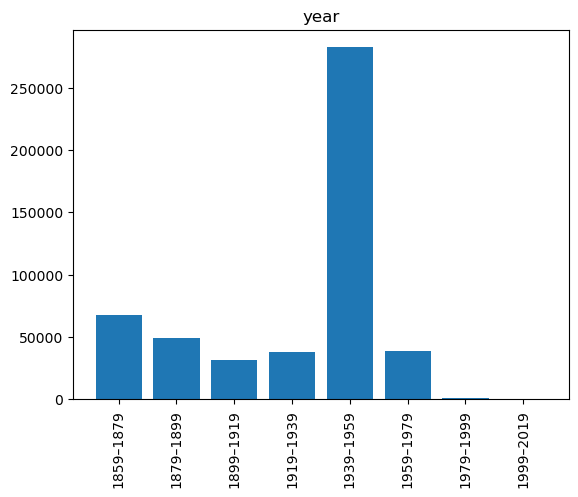

In [4]:
bins = list(range(1859, 2029, 20))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
morphotopes.hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

In [5]:
np.histogram(morphotopes["year"], bins=bins)

(array([ 67302,  49003,  31693,  37947, 282186,  38465,   1101,    346]),
 array([1859, 1879, 1899, 1919, 1939, 1959, 1979, 1999, 2019]))

In [6]:
morphotopes = morphotopes.dropna(subset=['year', 'num_buildings'])

In [7]:
morphotopes['year_bin'] = pd.cut(morphotopes['year'], bins=bins, labels=bin_labels, right=False)

avg_buildings = (
    morphotopes
    .groupby('year_bin')['num_buildings']
    .agg(['count', 'mean', 'median', 'min', 'max', 'std', 'sum'])
    .reset_index()
)
avg_buildings

/home/eliska/evolution/.pixi/envs/default/lib/python3.12/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_27831/4146526451.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_bin')['num_buildings']


,year_bin,count,mean,median,min,max,std,sum
0,1859–1879,67302,70.587783,35.0,1.0,3327.0,255.734352,4750699.0
1,1879–1899,49003,92.048120,27.0,1.0,5371.0,476.084704,4510634.0
2,1899–1919,31693,570.380967,24.0,1.0,18795.0,3070.518894,18077084.0
3,1919–1939,37947,77.621867,42.0,1.0,2431.0,217.722787,2945517.0
4,1939–1959,282186,1052.083367,48.0,1.0,66879.0,7213.594538,296883197.0
5,1959–1979,38465,7.405174,1.0,1.0,383.0,18.144597,284840.0
6,1979–1999,1101,40.301544,38.0,1.0,224.0,36.066679,44372.0
7,1999–2019,346,37.791908,39.5,1.0,187.0,34.071154,13076.0


In [8]:
morphotopes['num_buildings'].sum()

np.float64(327509421.0)